# Outlier Analysis

In [6]:
import numpy as np

## Load ABS datasets

In [1]:
# Load  population, boudaries, income, census datasets
# datasets are in pandas data frame format
'''
Reference:
boundaries
 https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files  
 data used for this analysis: https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/SA2_2021_AUST_SHP_GDA2020.zip"

population
 https://www.abs.gov.au/statistics/people/population/regional-population
 used: https://www.abs.gov.au/statistics/people/population/regional-population/2021/32180DS0001_2001-21.xlsx

income
 used: https://www.abs.gov.au/statistics/labour/earnings-and-working-conditions/personal-income-australia/2014-15-2018-19/6524055002_DO001.xlsx

census
 used: https://www.abs.gov.au/census/find-census-data/datapacks/download/2021_GCP_SA2_for_AUS_short-header.zip
 https://www.abs.gov.au/census/find-census-data/datapacks/
 variables dict: https://www.abs.gov.au/census/guide-census-data/census-dictionary/2021/variables-index
'''

# Download the covid and SA2 datasets 
%run "../scripts/external_data_download.py"

# Download the covid and SA2 datasets 
%run "../scripts/external_data_cleaning.py"

## Check outliers

### 1. Census data

In [2]:
census

,SA2_CODE_2021,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,Age_5_14_yr_M,Age_5_14_yr_F,Age_5_14_yr_P,...,High_yr_schl_comp_Yr_8_belw_P,High_yr_schl_comp_D_n_g_sch_M,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P
0,101021007,2234,2117,4343,111,98,207,278,210,487,...,103,5,10,14,1979,1902,3878,288,251,535
1,101021008,4264,4255,8517,276,252,526,595,495,1088,...,366,21,27,43,3989,3961,7950,240,220,460
2,101021009,5704,5638,11342,318,349,669,551,516,1067,...,410,35,52,83,5264,5143,10410,476,467,943
3,101021010,2647,2440,5085,163,164,319,253,216,469,...,116,10,12,27,2462,2344,4800,188,111,302
4,101021012,6331,6413,12744,416,421,835,984,896,1878,...,258,11,0,18,6079,6188,12260,175,187,358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2467,901021002,302,292,593,23,15,37,49,39,88,...,19,38,47,86,247,238,491,113,106,222
2468,901031003,149,158,310,7,14,14,18,29,46,...,15,0,0,0,125,145,267,121,53,178
2469,901041004,1060,1130,2188,59,41,101,139,114,247,...,27,3,0,4,878,962,1842,220,221,443
2470,997979799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# summary statistics
census.describe()

,SA2_CODE_2021,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,Age_5_14_yr_M,Age_5_14_yr_F,Age_5_14_yr_P,...,High_yr_schl_comp_Yr_8_belw_P,High_yr_schl_comp_D_n_g_sch_M,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P
count,2.472000e+03,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,...,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000
mean,3.177555e+08,5074.887136,5209.415049,10284.254450,304.443366,287.726537,592.122573,659.937298,624.126618,1284.021036,...,331.819984,36.371359,44.932039,81.187702,4671.415049,4849.175566,9520.668689,403.502832,360.169094,763.533172
std,1.977886e+08,3019.275754,3161.883118,6171.395057,219.873373,206.803401,425.874693,446.855274,422.855557,868.745310,...,278.136060,63.130754,82.883927,144.979398,2861.924988,3002.256759,5858.268839,553.756238,349.916121,861.977898
min,1.010210e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.270315e+08,2669.750000,2678.000000,5384.750000,138.000000,132.000000,269.000000,311.750000,295.750000,613.250000,...,137.000000,8.000000,7.000000,15.000000,2386.000000,2458.000000,4848.000000,149.750000,151.750000,306.000000
50%,3.030411e+08,4774.000000,4875.000000,9656.000000,259.000000,245.000000,503.500000,578.000000,547.000000,1126.000000,...,259.000000,17.000000,17.000000,33.500000,4371.500000,4504.000000,8849.500000,275.000000,285.000000,567.500000
75%,4.060111e+08,7169.000000,7511.500000,14675.000000,428.000000,407.000000,835.000000,936.250000,878.750000,1813.750000,...,455.000000,38.000000,46.000000,83.000000,6680.250000,7027.750000,13690.750000,475.000000,465.000000,943.000000
max,9.999995e+08,14327.000000,13783.000000,28116.000000,1644.000000,1501.000000,3139.000000,2695.000000,2531.000000,5229.000000,...,2303.000000,802.000000,1144.000000,1940.000000,13584.000000,13096.000000,26682.000000,11876.000000,4101.000000,14722.000000


### 2. Income

In [4]:
# sum of income for each SA2, not per person
income

,SA2,SA2_name,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019
8,101021007,Braidwood,101830606,109961530,115564780,119439615,120763285
9,101021008,Karabar,289762288,301618607,311923113,322715297,338308979
10,101021009,Queanbeyan,367366063,390044004,395374979,414579067,441160946
11,101021010,Queanbeyan - East,186867083,199164715,211520090,232611414,237035656
12,101021011,Queanbeyan Region,717452753,790019714,875609556,964410618,1050285692
...,...,...,...,...,...,...,...
2293,801091109,Phillip,127550251,144908476,152627566,176445396,202204199
2294,801091110,Torrens,101377942,101284791,108571370,114180929,124494941
2296,801101135,Coombs,20041745,70607603,115362521,137389722,179834174
2300,801101139,Wright,85871677,139012922,161448145,171246822,182421537


In [7]:
# summary statistics for each period
income.loc[:,['2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019']].astype(np.double).describe()

,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019
count,2.201000e+03,2.201000e+03,2.201000e+03,2.201000e+03,2.201000e+03
mean,3.606510e+08,3.717265e+08,3.882242e+08,4.101471e+08,4.315523e+08
std,2.856909e+08,2.975508e+08,3.100371e+08,3.302154e+08,3.462952e+08
min,7.862310e+05,5.882680e+05,6.455570e+05,5.566560e+05,-7.968300e+04
25%,1.614710e+08,1.624562e+08,1.688410e+08,1.747717e+08,1.829203e+08
50%,2.902994e+08,2.972294e+08,3.104201e+08,3.227508e+08,3.383091e+08
75%,4.786302e+08,4.955081e+08,5.147377e+08,5.447140e+08,5.749885e+08
max,3.049289e+09,3.223694e+09,3.299944e+09,3.438231e+09,3.493429e+09


<AxesSubplot:>

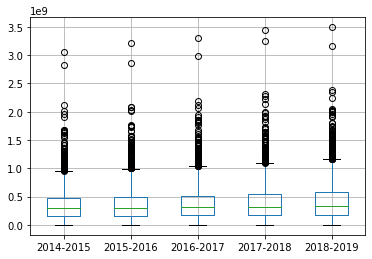

In [8]:
# distribution using boxplot
income.loc[:,['2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019']].astype(np.double).boxplot()

In [22]:
cols=['2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019']
remove_outliers(income, cols)

iter


<ipython-input-21-dd63519fb95a>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_filtered = df[(df[col] < upper_fence) & (df[col] > lower_fence)]


### 3. Boundaries

In [24]:
boundaries

,SA2_CODE21,SA2_NAME21,CHG_FLAG21,CHG_LBL21,SA3_CODE21,SA3_NAME21,SA4_CODE21,SA4_NAME21,GCC_CODE21,GCC_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,geometry
0,101021007,Braidwood,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,3418.3525,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.58424 -35.44426, 149.58444 -35.4..."
1,101021008,Karabar,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,6.9825,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21899 -35.36738, 149.21800 -35.3..."
2,101021009,Queanbeyan,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,4.7620,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.21326 -35.34325, 149.21619 -35.3..."
3,101021010,Queanbeyan - East,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.0032,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.24034 -35.34781, 149.24024 -35.3..."
4,101021012,Queanbeyan West - Jerrabomberra,0,No change,10102,Queanbeyan,101,Capital Region,1RNSW,Rest of NSW,1,New South Wales,AUS,Australia,13.6748,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((149.19572 -35.36126, 149.19970 -35.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,801111141,Namadgi,0,No change,80111,Uriarra - Namadgi,801,Australian Capital Territory,8ACTE,Australian Capital Territory,8,Australian Capital Territory,AUS,Australia,1202.7527,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((148.80407 -35.37619, 148.80417 -35.3..."
2466,901011001,Christmas Island,0,No change,90101,Christmas Island,901,Other Territories,9OTER,Other Territories,9,Other Territories,AUS,Australia,136.1356,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"POLYGON ((105.67393 -10.41566, 105.67399 -10.4..."
2467,901021002,Cocos (Keeling) Islands,0,No change,90102,Cocos (Keeling) Islands,901,Other Territories,9OTER,Other Territories,9,Other Territories,AUS,Australia,13.7258,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"MULTIPOLYGON (((96.91512 -12.14044, 96.91513 -..."
2468,901031003,Jervis Bay,0,No change,90103,Jervis Bay,901,Other Territories,9OTER,Other Territories,9,Other Territories,AUS,Australia,67.2296,http://linked.data.gov.au/dataset/asgsed3/SA2/...,"MULTIPOLYGON (((150.69567 -35.18295, 150.69556..."


### Population

In [25]:
population

,S/T_code,S/T_name,GCCSA_code,GCCSA_name,SA4_code,SA4_name,SA3_code,SA3_name,SA2_code,SA2_name,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
8,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021007,Braidwood,...,3590,3685,3762,3849,3950,4039,4140,4211,4273,4330
9,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021008,Karabar,...,9012,8848,8731,8603,8531,8526,8507,8488,8519,8546
10,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021009,Queanbeyan,...,10870,11050,11199,11213,11230,11355,11447,11450,11437,11370
11,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021010,Queanbeyan - East,...,4971,4983,4967,4961,4970,5013,5072,5117,5077,5093
12,1,New South Wales,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021012,Queanbeyan West - Jerrabomberra,...,13204,13210,13193,13164,13150,13083,13008,12935,12796,12743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,8,Australian Capital Territory,8ACTE,Australian Capital Territory,801,Australian Capital Territory,80111,Uriarra - Namadgi,801111141,Namadgi,...,40,37,38,39,39,45,50,56,61,67
2458,9,Other Territories,9OTER,Other Territories,901,Other Territories,90101,Christmas Island,901011001,Christmas Island,...,2107,2041,1979,1929,1903,1877,1849,1801,1752,1716
2459,9,Other Territories,9OTER,Other Territories,901,Other Territories,90102,Cocos (Keeling) Islands,901021002,Cocos (Keeling) Islands,...,546,547,556,555,546,569,571,599,605,602
2460,9,Other Territories,9OTER,Other Territories,901,Other Territories,90103,Jervis Bay,901031003,Jervis Bay,...,380,374,361,367,402,392,376,360,338,310


In [30]:
# check columns
#print(population.columns)

# check each column values
print(population.groupby("S/T_name").groups.keys())
#print(population.groupby("GCCSA_name").groups.keys())
#print(population.groupby("SA4_name").groups.keys())
#print(population.groupby("SA3_name").groups.keys())
#print(population.groupby("SA2_name").groups.keys())

dict_keys(['Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Other Territories', 'Queensland', 'South Australia', 'Tasmania', 'Victoria', 'Western Australia'])


In [43]:
# descriptive stats for each year
population.iloc[:, -21:].astype(np.int).describe()

<ipython-input-43-a207d0b3f1c5>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  population.iloc[:, -21:].astype(np.int).describe()


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000
mean,7854.401385,7944.258354,8036.160147,8122.543602,8222.022820,8333.726976,8487.213529,8659.005297,8839.304401,8977.893236,...,9263.840668,9424.665444,9566.294214,9704.969438,9857.745314,10022.087205,10173.856153,10326.086797,10454.477995,10467.839853
std,5244.703367,5241.522511,5238.899264,5243.485150,5254.399084,5279.727262,5335.189165,5410.454171,5491.754419,5553.991498,...,5670.875986,5741.065084,5811.661348,5885.798929,5973.900262,6042.781048,6104.371557,6172.067476,6229.349880,6222.168569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3875.250000,3962.250000,4066.000000,4135.500000,4189.000000,4278.250000,4357.750000,4461.000000,4578.250000,4652.250000,...,4834.500000,4966.000000,4998.750000,5061.250000,5096.500000,5234.500000,5345.000000,5371.750000,5449.500000,5529.750000
50%,6958.500000,7071.500000,7197.000000,7325.500000,7465.500000,7572.500000,7722.000000,7905.000000,8049.500000,8162.500000,...,8451.500000,8649.500000,8775.500000,8941.000000,9066.500000,9216.000000,9403.500000,9586.000000,9778.000000,9831.000000
75%,11252.250000,11406.000000,11550.750000,11613.750000,11842.000000,11971.500000,12178.500000,12432.750000,12717.000000,12905.250000,...,13319.750000,13579.500000,13787.500000,13995.000000,14213.000000,14370.250000,14507.000000,14698.500000,14832.750000,14911.000000
max,25036.000000,24681.000000,24288.000000,24184.000000,24082.000000,23989.000000,23898.000000,24040.000000,24232.000000,24627.000000,...,24983.000000,25157.000000,25320.000000,25466.000000,25646.000000,26452.000000,27243.000000,27854.000000,28250.000000,28573.000000


<ipython-input-45-ebc85e473ba5>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  population.iloc[:, -21:].astype(np.int).boxplot(rot=90)


<AxesSubplot:>

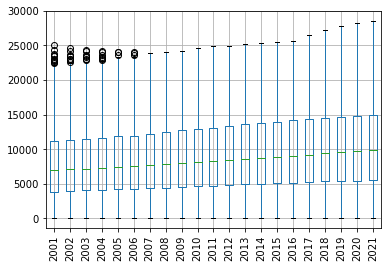

In [45]:
population.iloc[:, -21:].astype(np.int).boxplot(rot=90)

In [31]:
# population for each state and territorries
population.groupby("S/T_name").sum().iloc[:,-21:]

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
S/T_name,,,,,,,,,,,,,,,,,,,,,
Australian Capital Territory,321538,324627,327357,328940,331399,335170,342644,348368,354785,361766,...,376539,383257,388799,395813,403104,416824,430140,441277,450632,453558
New South Wales,6530349,6580807,6620715,6650735,6693206,6742690,6834156,6943461,7053755,7144292,...,7304244,7404032,7508353,7616168,7732858,7850871,7945580,8034305,8094317,8093815
Northern Territory,201743,202251,201725,202663,205905,209057,213748,219874,226027,229778,...,235915,241722,242894,244692,245678,248161,248363,248153,248943,249200
Other Territories,2584,2397,2336,2356,2381,2379,2514,2683,2876,3055,...,3033,2962,2896,2851,4608,4665,4716,4759,4791,4848
Queensland,3571469,3653123,3743121,3829970,3918494,4007992,4111018,4219505,4328771,4404744,...,4568687,4652824,4719653,4777692,4845152,4928374,5010502,5094718,5175003,5217653
South Australia,1503461,1511567,1520399,1528189,1538804,1552529,1570619,1588665,1608902,1627322,...,1656725,1671488,1686945,1700668,1712843,1729608,1748010,1770048,1793547,1803192
Tasmania,473668,474152,478534,483178,486202,489302,493262,498568,504353,508847,...,511724,512231,513621,515117,517514,528324,540112,552310,563507,567909
Victoria,4763615,4817774,4873809,4927149,4989246,5061266,5153522,5256375,5371934,5461101,...,5651091,5772669,5894917,6022322,6173172,6299798,6418168,6530852,6606149,6548040
Western Australia,1906274,1928512,1952741,1979542,2011207,2050581,2106139,2171700,2240250,2290845,...,2425507,2486944,2517608,2540672,2555978,2587577,2621052,2663795,2718400,2749864


In [34]:
# population statistics for each state and territory
population.groupby("S/T_name").sum().iloc[:,-21:].T.describe()

S/T_name,Australian Capital Territory,New South Wales,Northern Territory,Other Territories,Queensland,South Australia,Tasmania,Victoria,Western Australia
count,21.000000,2.100000e+01,21.000000,21.000000,2.100000e+01,2.100000e+01,21.000000,2.100000e+01,2.100000e+01
mean,375453.428571,7.266535e+06,228465.904762,3276.523810,4.440726e+06,1.641102e+06,510662.761905,5.625276e+06,2.326600e+06
std,43713.368888,5.452338e+05,18699.608825,974.142219,5.204593e+05,9.686733e+04,27476.546766,6.283682e+05,2.850146e+05
min,321538.000000,6.530349e+06,201725.000000,2336.000000,3.571469e+06,1.503461e+06,473668.000000,4.763615e+06,1.906274e+06
25%,335170.000000,6.742690e+06,209057.000000,2514.000000,4.007992e+06,1.552529e+06,489302.000000,5.061266e+06,2.050581e+06
50%,367985.000000,7.218529e+06,231292.000000,2896.000000,4.476778e+06,1.639614e+06,511483.000000,5.537817e+06,2.353409e+06
75%,403104.000000,7.732858e+06,245678.000000,4608.000000,4.845152e+06,1.712843e+06,517514.000000,6.173172e+06,2.555978e+06
max,453558.000000,8.094317e+06,249200.000000,4848.000000,5.217653e+06,1.803192e+06,567909.000000,6.606149e+06,2.749864e+06


<AxesSubplot:>

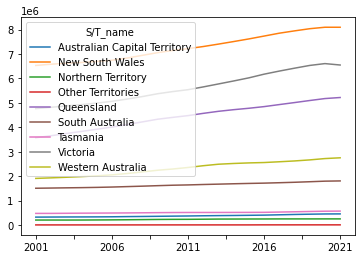

In [32]:
population.groupby("S/T_name").sum().iloc[:,-21:].T.plot()

<AxesSubplot:>

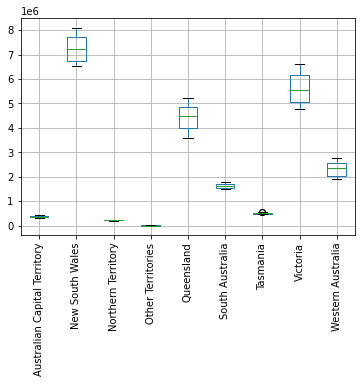

In [42]:
population.groupby("S/T_name").sum().iloc[:,-21:].T.boxplot(rot=90)

In [33]:
# population statistics for each GCCSA
population.groupby("GCCSA_name").sum().iloc[:,-21:].T.describe()

GCCSA_name,Australian Capital Territory,Greater Adelaide,Greater Brisbane,Greater Darwin,Greater Hobart,Greater Melbourne,Greater Perth,Greater Sydney,Other Territories,Rest of NSW,Rest of NT,Rest of Qld,Rest of SA,Rest of Tas.,Rest of Vic.,Rest of WA
count,21.000000,2.100000e+01,2.100000e+01,21.000000,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,21.000000,2.100000e+01,21.000000,2.100000e+01,21.000000,21.000000,2.100000e+01,21.000000
mean,375453.428571,1.264385e+06,2.142730e+06,129951.380952,218408.904762,4.237935e+06,1.817348e+06,4.656036e+06,3276.523810,2.610499e+06,98514.523810,2.297996e+06,376717.238095,292253.857143,1.387340e+06,509251.571429
std,43713.368888,8.220936e+04,2.784756e+05,16157.717000,16691.289824,5.310529e+05,2.476863e+05,4.161072e+05,974.142219,1.295511e+05,3327.119319,2.425071e+05,14679.705303,11045.080241,9.823071e+04,37899.097473
min,321538.000000,1.148006e+06,1.693556e+06,108280.000000,197403.000000,3.500249e+06,1.455361e+06,4.102580e+06,2336.000000,2.427769e+06,93292.000000,1.877913e+06,355455.000000,276265.000000,1.263366e+06,450913.000000
25%,335170.000000,1.189243e+06,1.908265e+06,113461.000000,204753.000000,3.760760e+06,1.576912e+06,4.256161e+06,2514.000000,2.486529e+06,95596.000000,2.099727e+06,363286.000000,284549.000000,1.300506e+06,473669.000000
50%,367985.000000,1.264091e+06,2.147436e+06,129106.000000,216273.000000,4.169366e+06,1.833567e+06,4.608949e+06,2896.000000,2.609580e+06,99289.000000,2.329342e+06,375523.000000,292256.000000,1.368451e+06,519842.000000
75%,403104.000000,1.324057e+06,2.362672e+06,147102.000000,225913.000000,4.714387e+06,2.019263e+06,5.024923e+06,4608.000000,2.707935e+06,100712.000000,2.482480e+06,388786.000000,295210.000000,1.458785e+06,542515.000000
max,453558.000000,1.402393e+06,2.568927e+06,149145.000000,251047.000000,5.054839e+06,2.192229e+06,5.284879e+06,4848.000000,2.834051e+06,103251.000000,2.648726e+06,400799.000000,316862.000000,1.571883e+06,557635.000000


In [46]:
# total population for each SA3
population.groupby("SA3_name").sum().iloc[:,-21:]

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
SA3_name,,,,,,,,,,,,,,,,,,,,,
Adelaide City,13211,13857,14533,15613,16573,17479,18549,19217,19914,20525,...,21537,22143,22624,23085,23552,24205,24723,25426,26027,25551
Adelaide Hills,61883,62739,63604,64454,65414,66195,66839,67647,68428,69251,...,70403,70913,71692,72465,73164,74233,75456,77110,78902,80501
Albany,53789,54062,54309,54369,54824,55289,55271,55748,56411,56711,...,58444,59445,60060,60290,60234,61046,61787,62473,63335,63959
Albury,55583,55982,56246,56529,56993,57456,58004,58373,58684,59068,...,59751,60371,61128,61752,62520,63442,64367,65165,66065,66941
Alice Springs,40207,40194,39960,39780,39710,39727,39898,40364,40918,41152,...,41129,41117,40425,39748,39243,39616,39869,40128,40421,40693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyong,134000,136142,137861,138776,139941,141166,143524,147185,149715,152010,...,155278,156950,158683,160484,162474,164500,166151,167478,168298,169279
Yarra,69294,70232,70956,71645,72542,73648,75128,76599,78033,79093,...,82060,84769,88037,90752,93743,95275,96304,97386,97499,92504
Yarra Ranges,140972,141647,141939,141911,142066,142648,143686,145088,146869,147670,...,149024,150069,151128,152549,154411,155816,156874,157766,157839,156600


In [47]:
# mean population for each SA3

SA3_tot = population.groupby("SA3_name").sum().iloc[:,-21:]
SA3_num = population.groupby("SA3_name").count().iloc[:,0]

for row in SA3_tot.index:
     SA3_tot.loc[row] = SA3_tot.loc[row] /  SA3_num[row]

SA3_tot

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
SA3_name,,,,,,,,,,,,,,,,,,,,,
Adelaide City,6605.500000,6928.500000,7266.500000,7806.500000,8286.500000,8739.500000,9274.500000,9608.500000,9957.000000,10262.500000,...,10768.500000,11071.500000,11312.000000,11542.500000,11776.000000,12102.500000,12361.500000,12713.000000,13013.500000,12775.500000
Adelaide Hills,7735.375000,7842.375000,7950.500000,8056.750000,8176.750000,8274.375000,8354.875000,8455.875000,8553.500000,8656.375000,...,8800.375000,8864.125000,8961.500000,9058.125000,9145.500000,9279.125000,9432.000000,9638.750000,9862.750000,10062.625000
Albany,4889.909091,4914.727273,4937.181818,4942.636364,4984.000000,5026.272727,5024.636364,5068.000000,5128.272727,5155.545455,...,5313.090909,5404.090909,5460.000000,5480.909091,5475.818182,5549.636364,5617.000000,5679.363636,5757.727273,5814.454545
Albury,11116.600000,11196.400000,11249.200000,11305.800000,11398.600000,11491.200000,11600.800000,11674.600000,11736.800000,11813.600000,...,11950.200000,12074.200000,12225.600000,12350.400000,12504.000000,12688.400000,12873.400000,13033.000000,13213.000000,13388.200000
Alice Springs,4020.700000,4019.400000,3996.000000,3978.000000,3971.000000,3972.700000,3989.800000,4036.400000,4091.800000,4115.200000,...,4112.900000,4111.700000,4042.500000,3974.800000,3924.300000,3961.600000,3986.900000,4012.800000,4042.100000,4069.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyong,9571.428571,9724.428571,9847.214286,9912.571429,9995.785714,10083.285714,10251.714286,10513.214286,10693.928571,10857.857143,...,11091.285714,11210.714286,11334.500000,11463.142857,11605.285714,11750.000000,11867.928571,11962.714286,12021.285714,12091.357143
Yarra,8661.750000,8779.000000,8869.500000,8955.625000,9067.750000,9206.000000,9391.000000,9574.875000,9754.125000,9886.625000,...,10257.500000,10596.125000,11004.625000,11344.000000,11717.875000,11909.375000,12038.000000,12173.250000,12187.375000,11563.000000
Yarra Ranges,10844.000000,10895.923077,10918.384615,10916.230769,10928.153846,10972.923077,11052.769231,11160.615385,11297.615385,11359.230769,...,11463.384615,11543.769231,11625.230769,11734.538462,11877.769231,11985.846154,12067.230769,12135.846154,12141.461538,12046.153846


In [77]:
# retrieving data in VIC
sa3_vic = set(population.loc[population["S/T_name"] == "Victoria"].groupby("SA3_name").groups.keys())
sa3_not_vic = (set(SA3_tot.index) -  sa3_vic)

In [82]:
# retrieving data in Capital Region (A4)
sa4_capital = set(population.loc[population["SA4_name"] == "Capital Region"].groupby("SA3_name").groups.keys())

<AxesSubplot:>

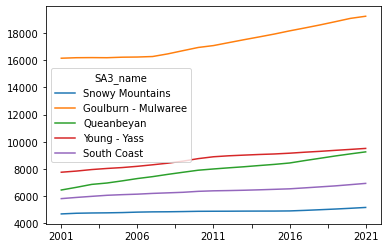

In [85]:
SA3_tot.loc[sa4_capital].T.plot()

<AxesSubplot:>

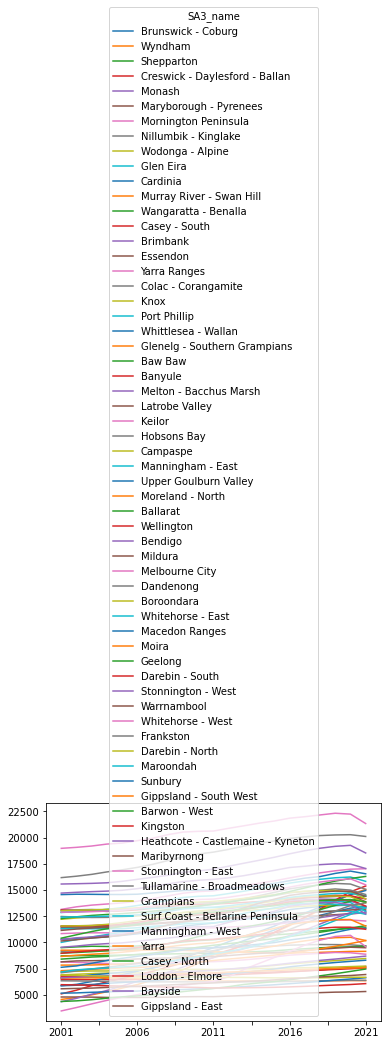

In [80]:
SA3_tot.loc[sa3_vic].T.plot() # too much data

<AxesSubplot:>

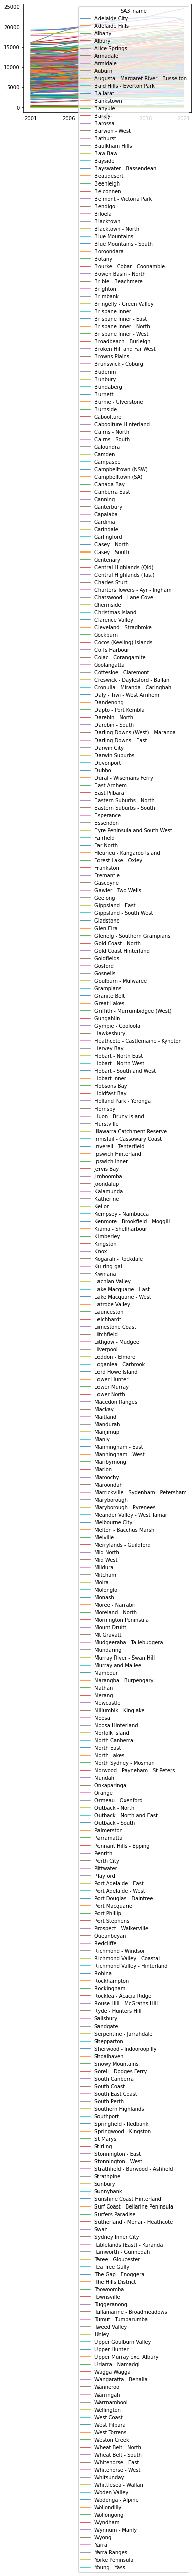

In [50]:
SA3_tot.T.plot() # too much data